# Getting the S-PLUS colored imagen 

Here we show how to get the colored images from the S-PLUS database using $\textbf{splusdata}$ package. With this package, it is possible to download colored images combining three bands and/or combining all twelve bands.

In [1]:
# Import the necessary packages 
import splusdata 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect
conn = splusdata.connect('Luis', 'plutarco*80') 

You have access to internal data


In [3]:
# Load the csv table
df = pd.read_csv('emission-objects.csv')
df.columns

Index(['Field', 'ID', 'RA', 'DEC'], dtype='object')

# Colored Image: 3- bands

Getting lupton image:

By default:

-) R_color = "I"

-) G_color = "R"

-) B_color = "G"

-) stretch = 3

-) Q = 5

Doing the colored images of the objects in the pandas DataFrame in a loop:

In [4]:
images = []
id_ = []
for key, value in df.iterrows():
  img = conn.get_img(value.RA, value.DEC, 200, R="I", G="R", B="G", stretch=0.5, Q=5)
  images.append(img)  # Add the PIL image resuls in a list
  id_.append(value.ID) # Add the ID of the objects in a list 
  print(value.RA, value.DEC)

156.1922208795262 -18.642300862355984
164.7459588212315 -31.60947413507693
316.47319569385303 -37.14456181858315
151.43944948967368 -44.35664815997231
155.1756706372574 -33.8339900762732
151.14107030288636 -37.335568889758896
159.56126817312304 -43.42941925667293
157.8959339121487 -46.44420284162901
159.9998687263755 -47.02397174690933
157.29582790778508 -35.687818629569826
162.16979020616287 -35.09014923662983
180.4845311148264 -18.87743596736424
161.9671272252362 -20.08148354643084
154.8382251423767 -22.14259842833651
1.9728879545721905 0.2999103172053955
4.416543859611166 0.5062627804218517
16.21112620279986 -1.1413143637354546
15.625098200551925 -0.5352093094283729


In [9]:
# Definition to do the colored images from the PIL image and save the resulted images
def plot_images(data, id_):
    fig, ax = plt.subplots()
    ax.imshow(data, origin='lower')
    plt.savefig(id_ + ".jpg")   # Save the images

Look  the RGB images of all the object in the DataFrame using de definion plot_images. Use the images list to generate the images and the id_ list to save the image files.

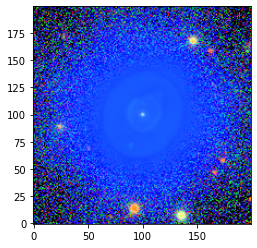

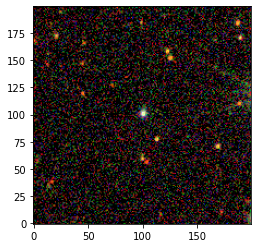

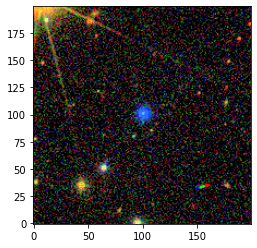

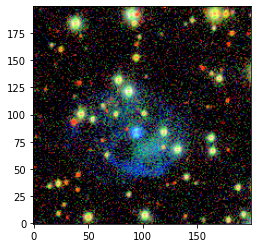

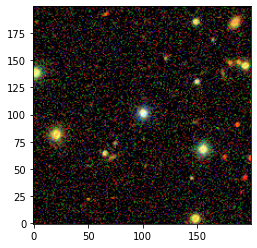

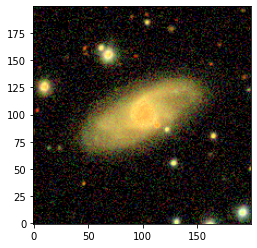

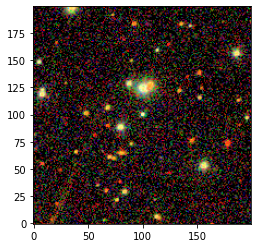

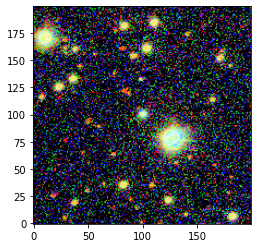

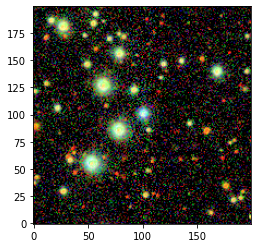

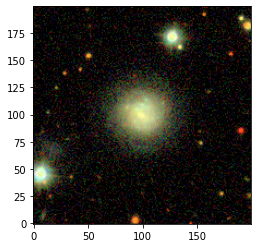

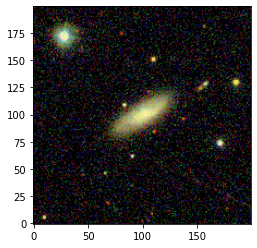

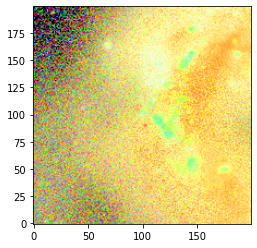

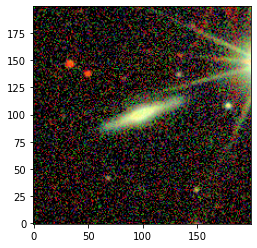

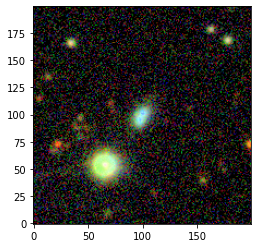

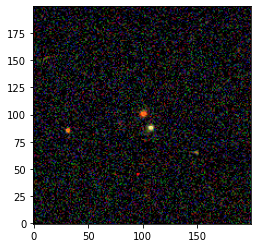

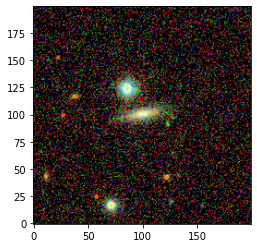

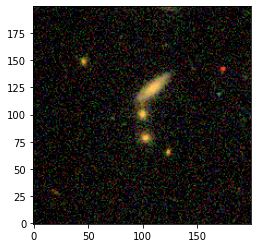

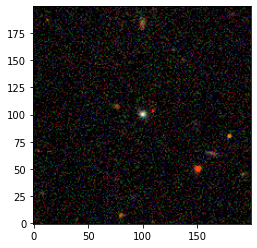

In [6]:
for i in range(len(images)):
    plot_images(images[i], id_[i])

# Colored Image: 12- bands

    By default
    
    
    -) noise=0.15
    
    -) saturation=0.15

Create colored images using the twelves bands of S-PLUS.

In [7]:
images_12 = []
for key, value in df.iterrows():
  img_12 = conn.twelve_band_img(value.RA, value.DEC, radius=200, noise=0.15, saturation=0.15)
  images_12.append(img_12)  # Add the PIL image resuls in a list

Generate the images using de definition "plot_images"

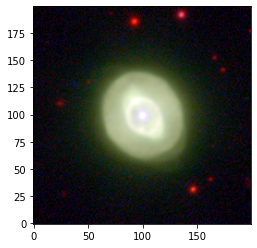

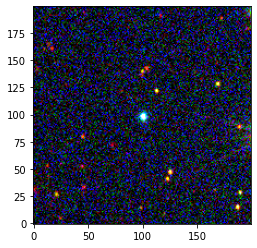

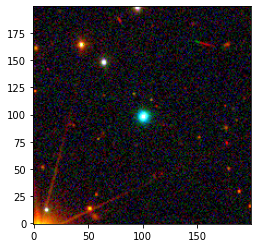

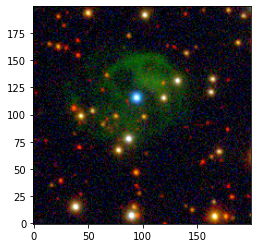

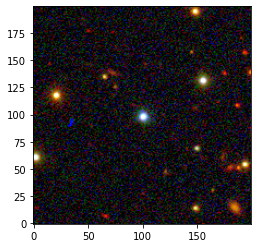

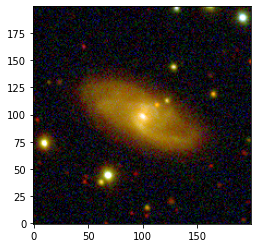

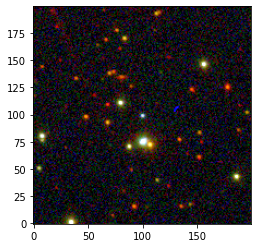

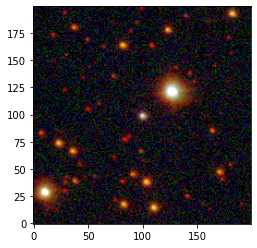

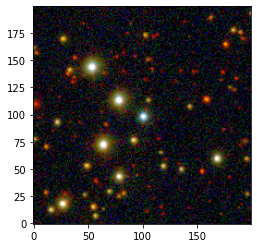

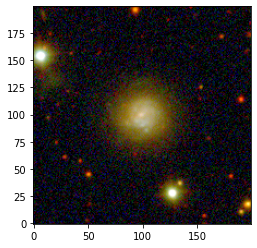

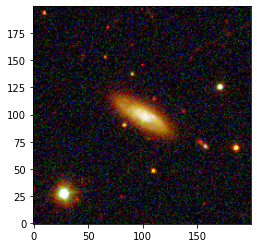

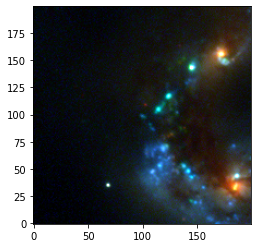

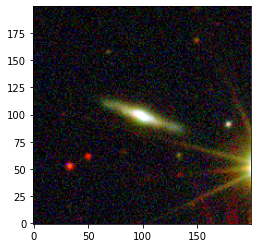

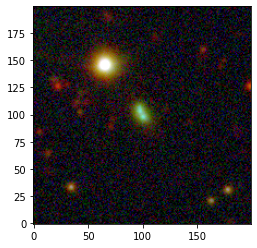

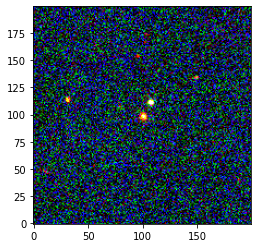

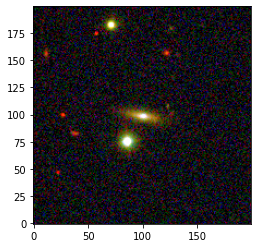

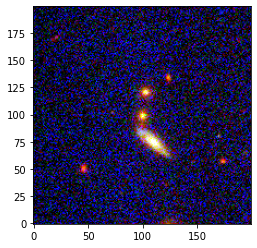

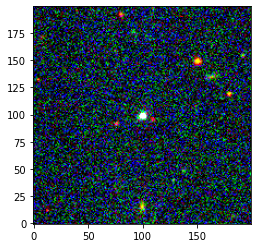

In [10]:
for i in range(len(images_12)):
    plot_images(images_12[i], id_[i])